## **07-2 심층 신경망**

심층(다층) 신경망은 입력층과 출력층 사이에 층(은닉층, hidden layer)을 추가한 신경망이다.

### **7-2-1 2개의 층**

07-1절과 동일하게 데이터를 준비하자.

In [1]:
from tensorflow import keras

(train,target1),(test,target2)=keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from sklearn.model_selection import train_test_split

strain=train/255.0
strain=strain.reshape(-1,28**2)

strain,val,target1,target3=train_test_split(strain,target1,stratify=target1,random_state=0)

In [3]:
print(strain.shape, val.shape)

(45000, 784) (15000, 784)


이제 교재 368쪽 그림과 같이 입력층과 출력층 사이에 밀집층을 하나 추가해보자.이런 층을 '은닉층(hidden layer)'라고 부른다.

만일 은닉층의 뉴런을 100개 만든다면 각 뉴런은 입력층으로부터 784개의 픽셀 값을 입력받아

$$h = w_1 \times {\rm pixel_1 } + \ldots + w_{784} \times {\rm pixel_{784}} + b $$

를 100개 얻고 이렇게 만든 100개의 $h_1 , \ldots, h_{100} $ 들을 각각 활성화함수(아래에서는 sigmoid 함수)를 써서 변환한다. 다음 코드 가운데 `dense1`이 은닉층을 나타낸다. 은닉층에서 활성화함수를 사용하는 이유는 367쪽 설명을 보라.



이어서 출력층에서는 은닉층에서 나온 100개의 입력을 가지고 10개의

$$ z = w_1 \times \phi(h_1) + \ldots + w_{100} \times \phi(h_{100}) + b $$

를 만들고 softmax 활성화함수로 10개 범주의 예측확률($a_1 , \ldots, a_{10} $)을 구한다. 은닉층과 출력층은 역시 `keras.layers`에 있는 `Dense()`를 이용해서 만들면 된다. 두 층의 객체이름을 순서대로 `dense1, dense2`라고 붙이자.

In [4]:
d1=keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
d2=keras.layers.Dense(10,activation='softmax')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **7-2-2 심층 신경망 만들기**

7-1절에서와 마찬가지로 케라스의 `Sequential()`클래스에 `dense1, dense2` 객체를 넣어서 은닉층이 있는 심층신경망(DNN, deep neural network)을 만들어보자.

유의할 점은 <u>은닉층부터 출력층까지 순서대로 리스트를 만들어 넣어야한다는 점</u>이다.

In [5]:
m=keras.Sequential([d1,d2])

모델에 대한 정보를 보려면 `summary()` 이용.

In [6]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

위의 결과에 대한 설명은 교재 372-374쪽 참조.

`model.summary()` 결과를 보면 앞에서 밀집층을 정의할 때 층(Layer)의 이름을 따로 붙이지 않았기 때문에 자동으로 `dense_1, dense_2`라는 이름이 붙었다. 만일 따로 이름을 붙이고 싶다면

    dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name = 'A')
    dense2 = keras.layers.Dense(10, activation='softmax', name = 'B')

와 같이 붙이면 된다.

출력의 'Output Shape'은 각 층의 출력 크기를 나타내는데 `dense1`의 출력 뉴런 수를 100개로 지정했기 때문에 `(None, 100)`가 된다. 다음 단계 `fit()`에서 훈련 데이터를 입력하고 신경망 모델을 만들 때에는 배치경사하강법을 이용하는데 우리는 아직 데이터를 입력하지 않았다는 것을 기억하자. `None`이 바로 `fit()` 단계에서 사용할 임의의 배치크기를 나타낸다(기본값은 32).

### **7-2-3 층을 추가하는 다른 방법**



  먼저 케라의 `Sequential()` 객체를 만든 다음, `add()` 메서드를 이용해서 층을 하나씩 추가.

In [8]:
m = keras.Sequential()
m.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
m.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
m.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

모델 훈련 - 검증

In [15]:
m.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
m.fit(strain,target1,epochs=5)
m.evaluate(val,target3)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7476 - loss: 0.7851
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8478 - loss: 0.4205
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8611 - loss: 0.3849
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8672 - loss: 0.3592
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8767 - loss: 0.3405
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8697 - loss: 0.3575


[0.3676546514034271, 0.8641999959945679]

은닉층을 추가한 결과 성능이 좋아졌는가?

### **7-2-4 렐루 활성화 함수**

**1) 활성화함수들**

시그모이드 함수 외에 심층 신경망에서 활성화함수로 많이 쓰이는 함수로 **'렐루(ReLU, Rectified Linear Unit)'함수**가 있다. 함수 그림은 377쪽에 있고 함수 식은 다음과 같다.

$$ \phi (z) = \max (0, z) $$.

ReLU 함수 외에 **hyperbolic tangent(tanh) 함수**도 은닉층의 활성화 함수로 많이 이용된다.

$$ \phi (z) = \frac {e^z - e^{-z}}{e^z + e^{-z}} $$.

시그모이드 함수 대신 다른 함수를 활성화함수로 이용하는 이유가 무엇일까? 시그모이드 함수가 가진 단점 때문이다.

어떤 단점인지 알아보기 위해 먼저 세 활성화함수를 그림으로 그려서 특성을 비교해보자.

In [25]:
import numpy as np

z = np.arange(-5, 5, 0.005)

log_act = 1/(1 + np.exp(-z))
tanh_act = np.tanh(z)
relu_act = z * (z>0)

그림을 한꺼번에 그려보자.

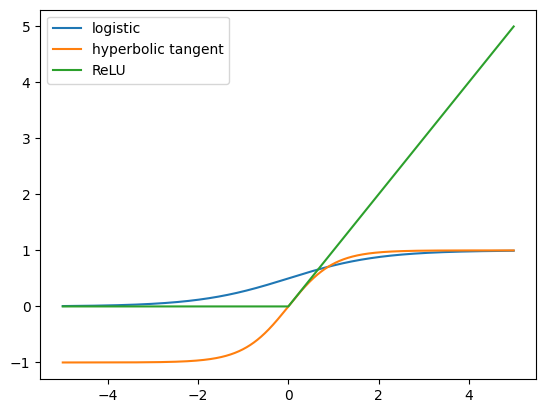

In [26]:
import matplotlib.pyplot as plt

plt.plot(z, log_act, label = "logistic")
plt.plot(z, tanh_act, label = "hyperbolic tangent")
plt.plot(z, relu_act, label= "ReLU")
plt.legend()

로지스틱과 하이퍼볼릭 탄젠트 함수는 **'그래디언트 소실 문제(vanishing gradient problem)'**라고 불리는 단점을 갖는다.

z가 큰 값일 때(가령 z=20, 25) 함수값들을 비교해보자.

In [37]:
z = np.array([20,25])

log_act = 1/(1 + np.exp(-z))
tanh_act = np.tanh(z)
relu_act = z * (z>0)

print(log_act,tanh_act,relu_act)

[1. 1.] [1. 1.] [20 25]


즉 큰 z 값 범위에서는 z가 20에서 25로 변해도 활성화 함수값은 그대로다. 그렇다면 손실함수의 미분(계산해보면 그래디언트가 활성화함수를 포함)을 이용하는 훈련과정이 매우 느려지는 문제가 생긴다.

당연히 렐루함수는 이런 문제를 해결해준다. 이들 함수 외에도 케라스에서는 [다양한 활성화함수](https://keras.io/api/layers/activations/)를 제공한다.

**2) `Flatten()`을 이용한 배열의 차원 변경**

간단한 넘파이 2차원 배열 x를 만든 다음, 1차원 배열로 차원을 바꿔보자. 넘파이 함수 `flatten()` 또는 `reshape()`을 이용할 수 있다.

In [38]:
x = np.arange(12).reshape(3,4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [39]:
y1 = x.flatten()
y1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [42]:
y2 = x.reshape(-1,)
y2

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

행이 아닌 열을 기준으로 삼아 순서를 바꿔서 1차원 배열로 만들려면

In [43]:
y3 = x.flatten('F')
y3

array([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])

2차원 배열을 `reshape()`을 이용해서 미리 1차원배열로 바꾼 다음 신경망모델을 만드는 대신 아래와 같이 `keras.layers.Flatten()`을 이용해도 된다.

In [79]:
from tensorflow import keras

(train,target1),(test,target2)=keras.datasets.fashion_mnist.load_data()

from sklearn.model_selection import train_test_split

strain=train/255.0

strain,val,target1,target3=train_test_split(strain,target1,stratify=target1,random_state=0)

In [80]:
m=keras.Sequential()

m.add(keras.layers.Flatten(input_shape=(28,28)))
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
m.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

`Flatten()`층은 신경망을 학습하는 층이 아니며,   은닉층의 활성화함수는 ReLU다.

In [82]:
m.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

m.fit(strain, target1, epochs=5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7625 - loss: 0.6891
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8509 - loss: 0.4098
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8693 - loss: 0.3660
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8785 - loss: 0.3384
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8846 - loss: 0.3195


In [83]:
m.evaluate(val, target3)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8802 - loss: 0.3450


[0.3537482023239136, 0.8773999810218811]

활성화함수로 ReLU를 이용한 은닉층을 추가한 결과, 분류 정확도가 높아졌다.

In [87]:
m.optimizer

### **7-2-5 옵티마이저**

* 하이퍼 파라미터 : 모델이 학습하지 않고 사람이 정해주어야하는 파라미터.

  신경망 모델의 하이퍼파라미터 : 많다(은닉층 수, 은닉층 뉴런 수, 활성화 함수, 층의 종류, batch_size, epochs, _optimizer_, ......)

신경망 모델은 경사하강법을 이용해서 모델을 만드는데 경사하강법 알고리즘은 하나가 아니고 여럿이다. `compile()`의 괄호 안에는 `loss = , metrics = ` 외에  `optimizer = `를 지정해서 어떤 경사하강법 알고리즘을 이용할지 지정할 수 있다.

이 역시 하이퍼파라미터인데 만일 아래에 소개하는 알고리즘들 가운데 하나를 `optimizer=`에서 따로 지정하지 않으면 `RMSprop`을 기본 알고리즘으로 이용한다.

* **optimizer : `compile()`에서 지정하는 경사하강법 알고리즘의 종류 (`RMSprop, SGD, Adagrad, Adam, ...`)**

optimizer는 크게 두 종류로 나눌 수 있는데 하나는 기본 경사하강법(`SGD`)이고 다른 하나는 '적응적 학습률(adaptive learning rate)'을 이용하는 경사하강법이다.

1) 기본 경사하강법 옵티마이저

**RMSprop**

In [104]:
m=keras.Sequential()

m.add(keras.layers.Flatten(input_shape=(28,28)))
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dense(10,activation='softmax'))

m.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

m.fit(strain, target1, epochs=5)

m.evaluate(val, target3)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7642 - loss: 0.6810
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8519 - loss: 0.4119
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8680 - loss: 0.3632
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8804 - loss: 0.3332
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8847 - loss: 0.3169
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8738 - loss: 0.3640


[0.3674064576625824, 0.8700000047683716]

In [105]:
m.optimizer

**SGD**

위의 코드는 아래와 마찬가지다(따옴표에 유의할 것).

In [93]:
m=keras.Sequential()

m.add(keras.layers.Flatten(input_shape=(28,28)))
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dense(10,activation='softmax'))

m.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

m.fit(strain, target1, epochs=5)

m.evaluate(val, target3)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6690 - loss: 1.0683
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8122 - loss: 0.5544
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8344 - loss: 0.4938
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8409 - loss: 0.4637
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8462 - loss: 0.4442
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8230 - loss: 0.4717


[0.482281893491745, 0.8217999935150146]

In [94]:
m.optimizer

**Adagrad**

In [95]:
m=keras.Sequential()

m.add(keras.layers.Flatten(input_shape=(28,28)))
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dense(10,activation='softmax'))

m.compile(optimizer='adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

m.fit(strain, target1, epochs=5)

m.evaluate(val, target3)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5574 - loss: 1.5501
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7443 - loss: 0.8239
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7723 - loss: 0.7166
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7894 - loss: 0.6602
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7970 - loss: 0.6291
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8005 - loss: 0.6078


[0.6142734289169312, 0.798799991607666]

In [96]:
m.optimizer

2) 적응적 학습률 경사하강법 옵티마이저

 또한 계속 고정된 학습률을 이용하는 대신 '적응적(adaptive)' 방법을 쓰면 모델이 최적점에 가까이 갈수록 학습률을 작은 값으로 조정할 수 있다.

 `Adagrad, RMSprop`가 대표적인 적응적 옵티마이저('RMSprop'는 'Root Mean Squared Propagation'의 줄임말)인데, 옵티마이저를 지정하지 않았을 때의 기본 방법이 `RMSprop`다. 또한 모멘텀 최척화와 적응적 방법의 장점을 접목한 `Adam` 옵티마이저도 널리 쓰인다.

 이 옵티마이저들의 learning rate 기본값은 0.001이다. 기본 경사하강법 옵티마이저와 적응적 방법의 차이점은 고정된 학습률대신 단계마다 학습률을 조정해서 최적값을 더 잘 찾도록 만든 것이다.

**Adam**

In [99]:
m=keras.Sequential()

m.add(keras.layers.Flatten(input_shape=(28,28)))
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dense(10,activation='softmax'))

m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

m.fit(strain, target1, epochs=5)

m.evaluate(val, target3)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7615 - loss: 0.6852
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8557 - loss: 0.4077
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8685 - loss: 0.3639
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8769 - loss: 0.3360
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8886 - loss: 0.3059
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8718 - loss: 0.3431


[0.3500010669231415, 0.869866669178009]

In [100]:
m.optimizer

**Nadam**

In [102]:
m=keras.Sequential()

m.add(keras.layers.Flatten(input_shape=(28,28)))
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dense(10,activation='softmax'))

m.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

m.fit(strain, target1, epochs=5)

m.evaluate(val, target3)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7792 - loss: 0.6623
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8589 - loss: 0.4020
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8723 - loss: 0.3550
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8827 - loss: 0.3259
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8863 - loss: 0.3082
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8615 - loss: 0.3715


[0.38251563906669617, 0.8578000068664551]

In [103]:
m.optimizer